## PCA

In [3]:
import pandas as pd
import numpy as np
import numpy.random as rd
import sklearn
import sklearn.datasets as ds
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#get attributes
#dir(PCA)

### Visualizing PCA and centering data

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


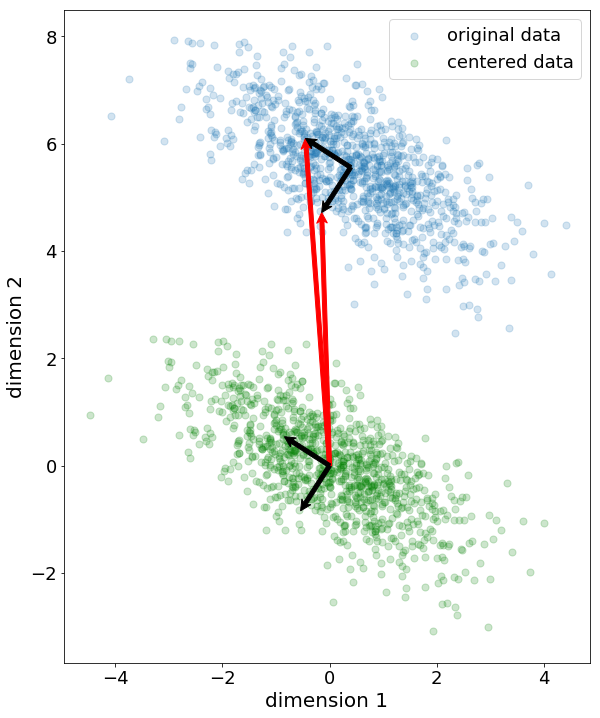

In [4]:
mean = np.array([.5, 5.5])
cov = np.array([[1.5, -.75], [-.75, .85]])
rd.seed = 42
data = rd.multivariate_normal(mean, cov, 1000)
c_data = data - data.mean(axis=0) #centered data

U, S, V = np.linalg.svd(c_data)

fig = plt.figure(figsize=(13,12))


plt.scatter(data[:, 0], data[:, 1], alpha = .2, s=50, label="original data");
ax = plt.axes()
bias = data.mean(axis=0)
ax.arrow(0, 0, bias[0] + V[0, 0], bias[1] + V[0, 1] , head_width=.2, head_length=0.2, fc='r', ec='r', width = .075, overhang = .2, length_includes_head = True)
ax.arrow(0, 0, bias[0] + V[1, 0], bias[1] + V[1, 1] , head_width=.2, head_length=0.2, fc='r', ec='r', width = .075, overhang = .2, length_includes_head = True)

plt.scatter(c_data[:, 0], c_data[:, 1], c='g', alpha = .2, s=50, label="centered data");
ax = plt.axes();
ax.arrow(0, 0, V[0, 0] , V[0, 1] , head_width=.2, head_length=0.2, fc='k', ec='k', width = .075, overhang = .2, length_includes_head = True);
ax.arrow(0, 0, V[1, 0] , V[1, 1] , head_width=.2, head_length=0.2, fc='k', ec='k', width = .075, overhang = .2, length_includes_head = True);

ax.arrow(bias[0], bias[1], V[0, 0], V[0, 1] , head_width=.2, head_length=0.2, fc='k', ec='k', width = .075, overhang = .2, length_includes_head = True)
ax.arrow(bias[0], bias[1], V[1, 0], V[1, 1] , head_width=.2, head_length=0.2, fc='k', ec='k', width = .075, overhang = .2, length_includes_head = True)
ax.set_aspect('equal')

plt.xlabel("dimension 1", fontsize=20)
plt.ylabel("dimension 2", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.legend(loc='best', fontsize=18)

In [5]:
?rd.seed #convert a number of string to an integer
?rd.multivariate_normal #draw random samples from a multivar normal distribution
#use type(object) to see whether object is a list, series, dataframe or arra
data.mean(axis=0) #in both dataframe, axies=0 is col, =1 is row!
?np.ndarray.mean
?np.linalg.svd #singular value decomposition
?ax.set_aspect #equal means same scaling for x and y; equal means that the x and y dimensions are the same length in data coordinates.
?plt.tick_params
?plt.legend #'best' only implements on axis legend

### Feature Contribution on the Scaled Data

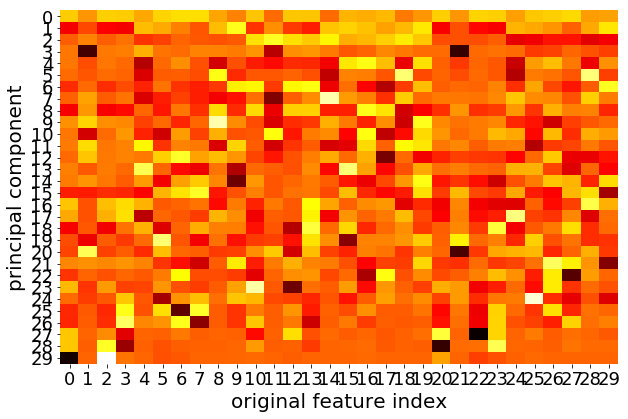

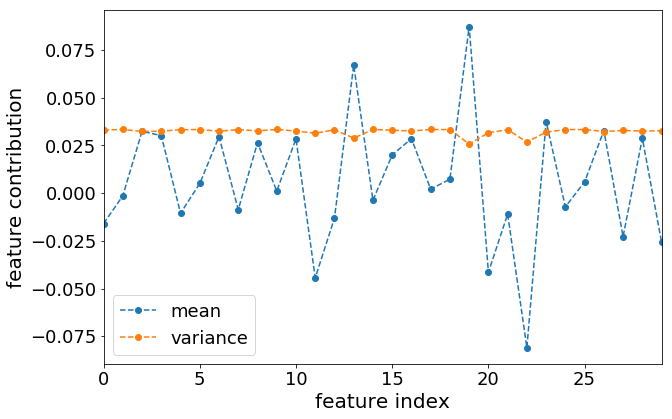

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

n_comp =30
pca_trafo = PCA(n_components=n_comp)
data = ds.load_breast_cancer()['data']

z_scaler = StandardScaler()
z_data = z_scaler.fit_transform(data)

pca_data = pca_trafo.fit_transform(z_data)
pca_inv_data = pca_trafo.inverse_transform(np.eye(n_comp))

fig = plt.figure(figsize=(10, 6.5))
sns.heatmap(pca_trafo.inverse_transform(np.eye(n_comp)), cmap="hot", cbar=False)
plt.ylabel('principal component', fontsize=20);
plt.xlabel('original feature index', fontsize=20);
plt.tick_params(axis='both', which='major', labelsize=18);
plt.tick_params(axis='both', which='minor', labelsize=12);

fig = plt.figure(figsize=(10, 6.5))
plt.plot(pca_inv_data.mean(axis=0), '--o', label = 'mean')
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o', label = 'variance')
plt.legend(loc='lower right')
plt.ylabel('feature contribution', fontsize=20);
plt.xlabel('feature index', fontsize=20);
plt.tick_params(axis='both', which='major', labelsize=18);
plt.tick_params(axis='both', which='minor', labelsize=12);
plt.xlim([0, 29])
plt.legend(loc='lower left', fontsize=18)

In [7]:
len(data[0])  #so 30 features, feature indes is [0,29)

30

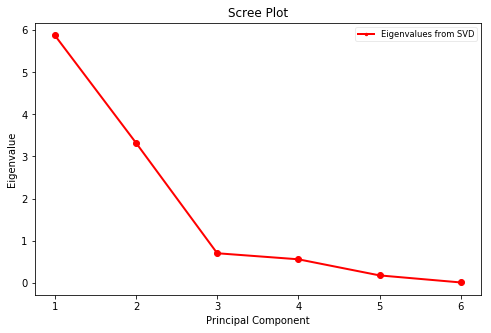

In [8]:
#this one doesn't use PCA function

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#Make a random array and then make it positive-definite
num_vars = 6
num_obs = 9
A = np.random.randn(num_obs, num_vars)
A = np.asmatrix(A.T) * np.asmatrix(A)
U, S, V = np.linalg.svd(A) 
eigvals = S**2 / np.cumsum(S)[-1]

fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(num_vars) + 1
plt.plot(sing_vals, eigvals, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
#I don't like the default legend so I typically make mine like below, e.g.
#with smaller fonts and a bit transparent so I do not cover up data, and make
#it moveable by the viewer in case upper-right is a bad place for it 
leg = plt.legend(['Eigenvalues from SVD'], loc='best', borderpad=0.3, 
                 shadow=False, prop=matplotlib.font_manager.FontProperties(size='small'),
                 markerscale=0.4)
leg.get_frame().set_alpha(0.4)
leg.draggable(state=True)
plt.show()

In [9]:
?np.random.randn #return a sample from the standard normal distribution with d0, d1...dn dimensions
?np.arange #return evenly spaced values within a given interval
#for integer arguments the function is equivalent to the python built-in range
#eg. np.arange(6) returns 0-5


In [10]:
np.cumsum(S)

array([ 15.37400596,  26.93428193,  32.24635874,  36.9836964 ,
        39.64078925,  40.21350135])

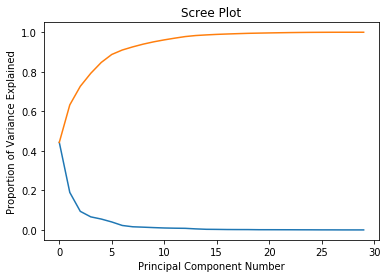

In [13]:
pca = PCA()
pca.fit(z_data)


# ## Scree Plot

# Let's make a scree plot
pve = pca.explained_variance_ratio_
pve.shape
plt.plot(range(len(pve)), pve)
plt.plot(range(len(pve)), pve.cumsum())
plt.title("Scree Plot")
plt.ylabel("Proportion of Variance Explained")
plt.xlabel("Principal Component Number")
plt.show()